<a href="https://colab.research.google.com/github/IDCE-MSGIS/lab-5-airport-historgram-data-mlazarz/blob/main/CompProg_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Author:  Mitchell Lazarz
Version:  Python 3--Jupytor Notebooks
Creation Date:  21 November 2020
Description: This .ipynb file contains 1 Getting Started exercise and 4 coding
challenges.  The first exercise imports and reads a csv file of refugee camps
stats and prints each row of the file.  Challenge 1 imports and displays
all airports in Argentina from an airports data file.  Challenge 2 creates two 
dictionaries that contains an international airport ID and location latitude and
an international airport ID and location longitude from the data file of 
airports.  Challenge 3 uses these dictionaries and a file of flight paths to 
calculate the distance of flight paths; these distances are added to a list.
Challenge 4 creates a histogram of flight path distances from the list showing
distance on the x axis and number of flights in the y axis.
'''

GETTING STARTED:

In [2]:
# Upload Camp_stats.csv from local drive to Colab.
from google.colab import files
uploaded = files.upload()

Saving Camp_stats.csv to Camp_stats.csv


In [4]:
# The Camp_stats csv is imported, opened, and the rows are printed.
import csv # Import the csv module
Camp_stats=open("Camp_stats.csv") # Open the Camp_stats table
for row in csv.reader(Camp_stats): # For row in the Camp_stats table
    print(row) # Print the row


['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


CHALLENGE 1

In [6]:
# Upload airports.dat from local drive to Colab.
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports.dat


In [7]:
# The airports data is imported, opened, and names of all airports in Argentina are printed.
import csv # Import csv module
airports=open("airports.dat") # Open airports table
for row in csv.reader(airports): # For row in airport table
  if row[3]=='Argentina': # If the country field is equal to Argentina
    print(row[1]) # Print the airport name field

Comodoro Pierrestegui Airport
Gualeguaychu Airport
Junin Airport
General Urquiza Airport
Islas Malvinas Airport
Sauce Viejo Airport
Jorge Newbery Airpark
Ingeniero Ambrosio Taravella Airport
Chamical Airport
San Fernando Airport
Mariano Moreno Airport
La Plata Airport
Moron Airport
El Palomar Airport
Chos Malal Airport
Dr. Arturo H. Illia Airport
El Plumerillo Airport
Comodoro D.R. Salomón Airport
Suboficial Ay Santiago Germano Airport
Catamarca Airport
Vicecomodoro Angel D. La Paz Aragonés Airport
Tinogasta Airport
Capitan V A Almonacid Airport
Chilecito Airport
Teniente Benjamin Matienzo Airport
Domingo Faustino Sarmiento Airport
Area De Material Airport
Villa Dolores Airport
La Quiaca Airport
Marcos Juarez Airport
Villa Reynolds Airport
Brigadier Mayor D Cesar Raul Ojeda Airport
Corrientes Airport
Resistencia International Airport
Formosa Airport
Cataratas Del Iguazú International Airport
Paso De Los Libres Airport
Monte Caseros Airport
Libertador Gral D Jose De San Martin Airport
T

CHALLENGE 2

In [8]:
# This code creates prints two dictionaries. One with airport code and latitude, one with airport code and longitude.
airportID=[] # An empty airportID list is created
airportLat=[] # An empty airport latitude list is created
airportLong=[] # An empty airport longitude list is created

import csv # The csv module is imported
airports=open("airports.dat") # The airport table is opened
for row in csv.reader(airports): # For row in the airport table
  airportID.append(row[0]) # Append the ID field to the airportID list
  airportLat.append(row[6]) # Append the Latitude field to the airportLat list
  airportLong.append(row[7]) # Append the Longitude field to the airportLong list
airportIDLat=dict(zip(airportID,airportLat)) # Create a dictionary with key, value as Airport ID, Latitude
airportIDLong=dict(zip(airportID,airportLong)) # Create a dictionary with key, value as Airport ID, Longitude

# Print both dictionaries
# print(airportIDLat)
# print(airportIDLong)

CHALLENGE 3

In [ ]:
# Airline route table is uploaded from local drive to Google Colab
from google.colab import files
uploaded = files.upload()

# math module is imported with necessary operations
from math import cos,radians,sin,pow,asin,sqrt

# An empty list for output distances is created
distancesList=[]

# The csv module is imported
import csv
routes=open("routes.dat") # The airline route table is opened
for row in csv.reader(routes): # For rows within the airline table
  sourceID=row[3] # The route source is assigned to sourceID variable
  destID=row[5] # The route destination is assigned to destID variable
  if sourceID in airportIDLat and sourceID in airportIDLong and destID in airportIDLat and destID in airportIDLong: # This line ensures that all coordinates used in the calculation are valid
    lat1=airportIDLat.get(sourceID) # The route source latitude is found by matching the source airport code to the airport latitude dictionary
    long1=airportIDLong.get(sourceID) # The route source longitude is found by matching the source airport code to the airport longitude dictionary
    lat2=airportIDLat.get(destID) # The route destination latitude is found by matching the source airport code to the airport latitude dictionary
    long2=airportIDLong.get(destID) # The route source destination is found by matching the source airport code to the airport longitude dictionary
  
  # All coordinates are converted from strings to floats
  lat1=float(lat1)
  lat2=float(lat2)
  long1=float(long1)
  long2=float(long2)
 
  radius = 6371 # Radius of the earth in km
  
  # All coordinates are converted from degrees to radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  # The distance between airports is calculated in km using the Haversine formula for Geographic Great Circle Distance
  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))
  
  # The calculated route distance is appended to the distances list
  distancesList.append(distance)
  


Saving routes.dat to routes (34).dat


CHALLENGE 4

Text(0.5, 1.0, 'Distances Between All International Airline Routes')

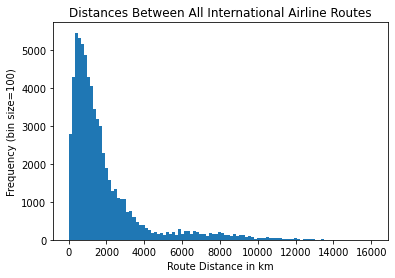

In [ ]:
# numpy and matplotlib.pyplot are imported
import numpy as np
import matplotlib.pyplot as plt

# A histogram of route distances is plotted using a bin size of 100
plt.hist(distancesList,100,None)
plt.xlabel("Route Distance in km") # x-axis label is added
plt.ylabel("Frequency (bin size=100)") # y-axis label is added
plt.title("Distances Between All International Airline Routes") # Graph title is added

